In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv("./Dataset/CompressedData.csv")
X_train.head()

,Count,Open,High,Low,Close,Volume,VWAP,new_date,Asset_ID,Target
0,-0.420178,-0.231602,-0.231818,-0.231463,-0.231600,-0.163735,-0.231575,2018-01-01,0,0.000148
1,-0.406696,-0.231558,-0.231774,-0.231420,-0.231556,-0.163475,-0.231531,2018-01-02,0,0.000393
2,-0.412850,-0.231527,-0.231744,-0.231389,-0.231525,-0.163609,-0.231500,2018-01-03,0,0.000549
3,-0.411005,-0.231471,-0.231686,-0.231333,-0.231469,-0.163602,-0.231444,2018-01-04,0,0.000006
4,-0.389464,-0.230984,-0.231194,-0.230852,-0.230981,-0.162833,-0.230957,2018-01-05,0,0.005618


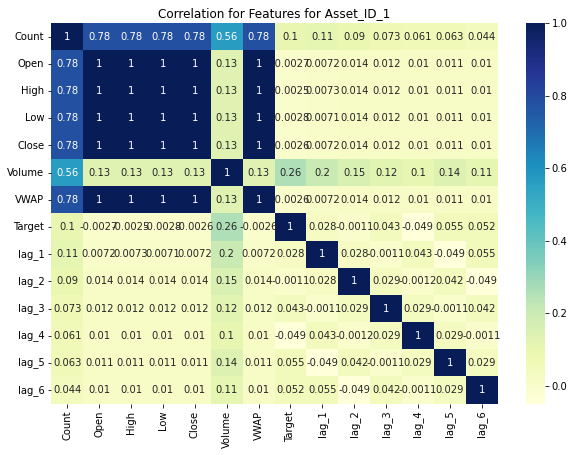

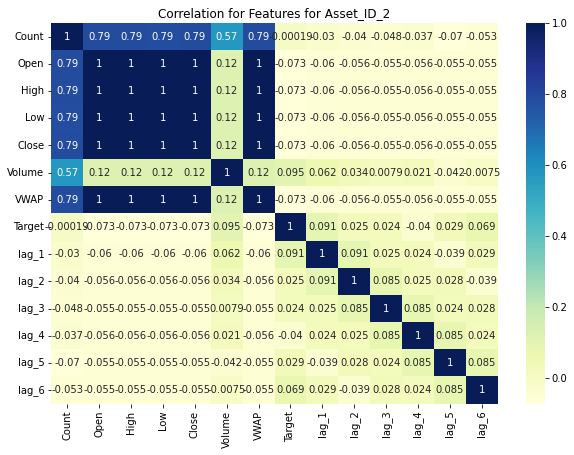

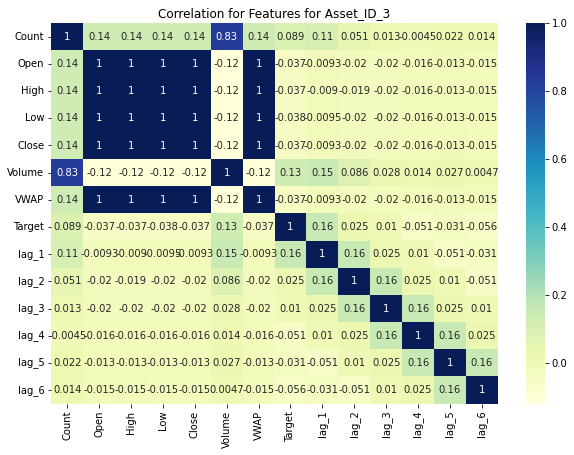

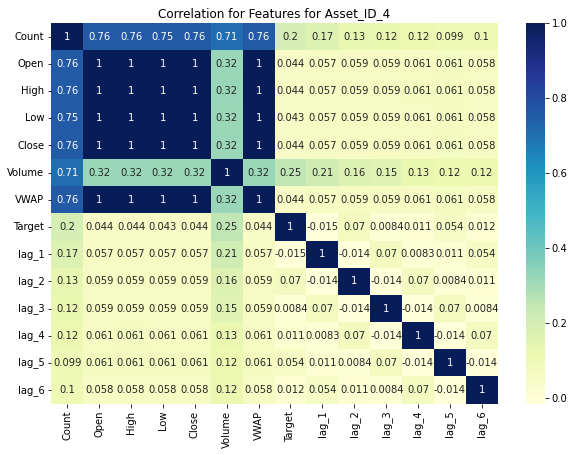

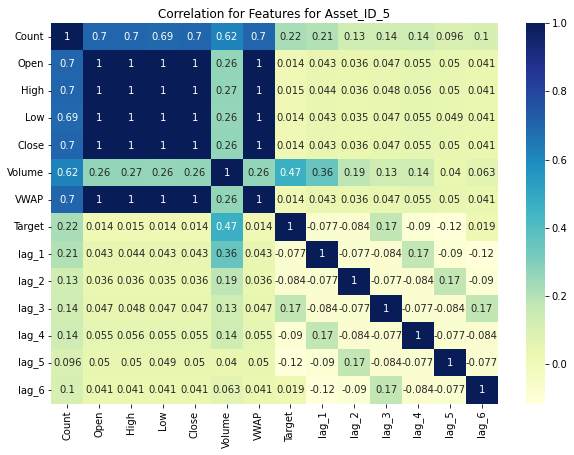

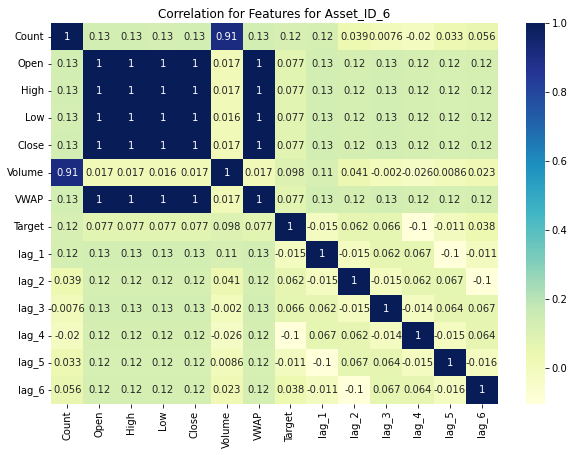

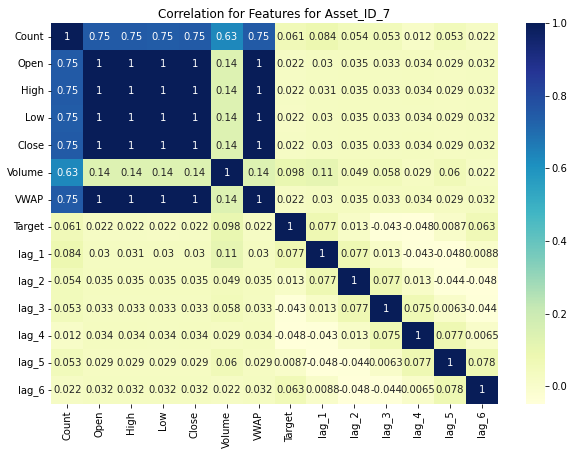

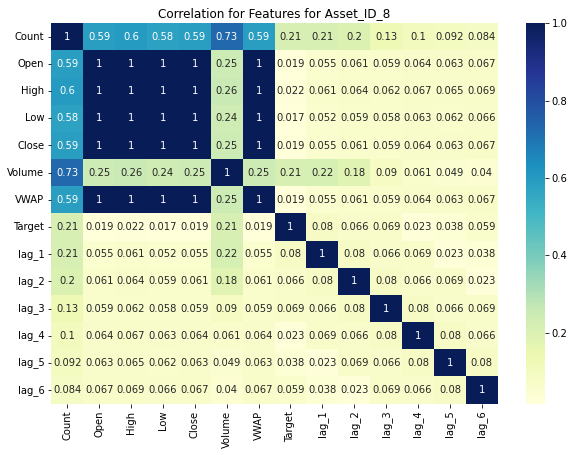

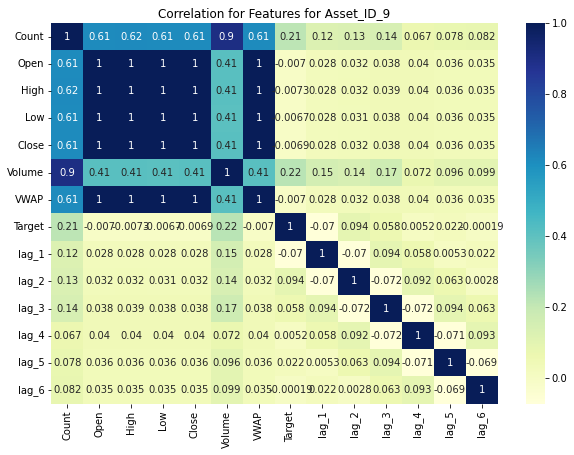

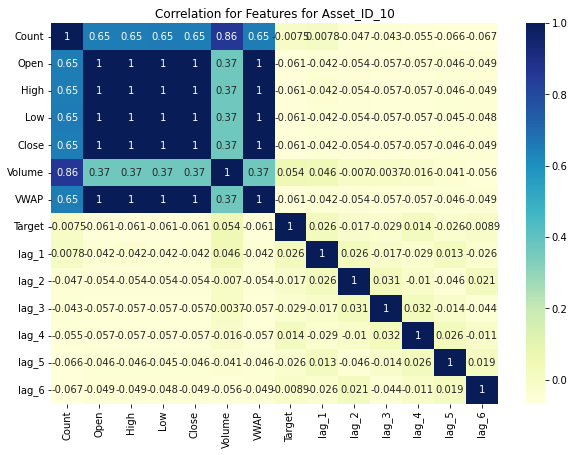

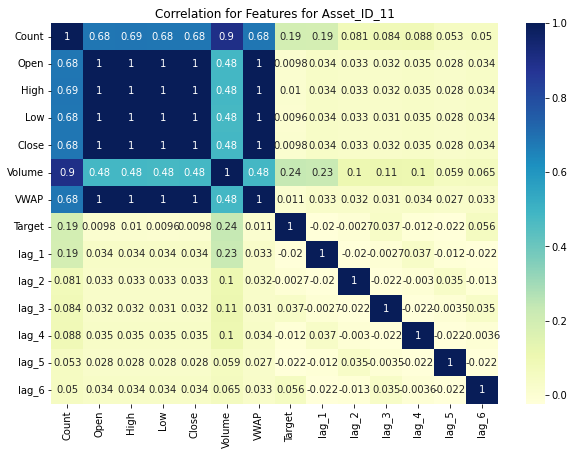

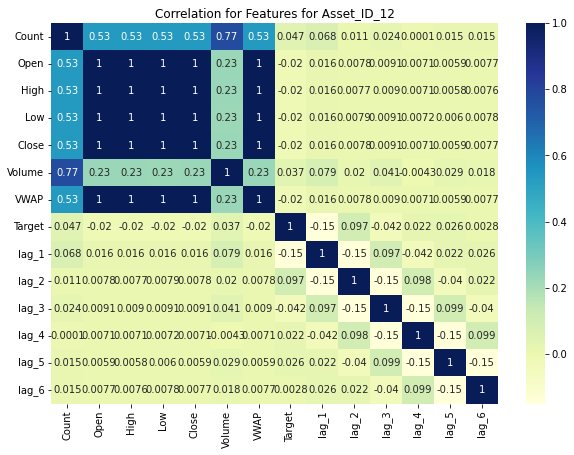

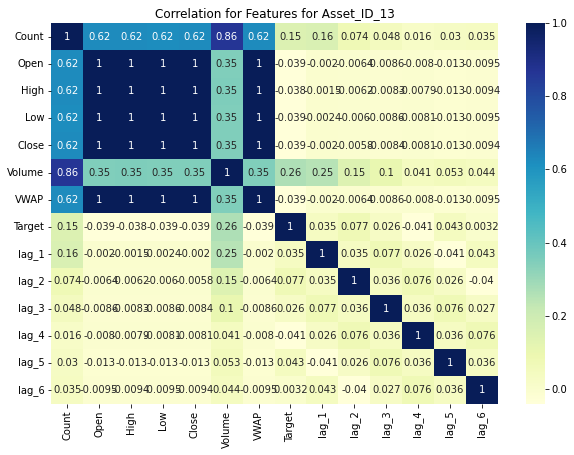

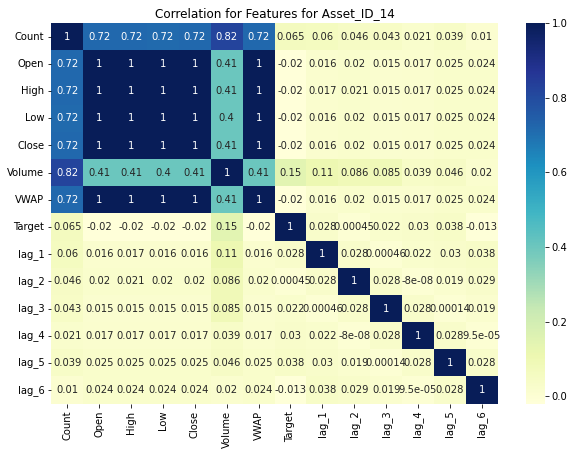

In [3]:
Asset_ID = list(range(0, 14))
for id in Asset_ID:
    temp = "./Dataset/X_train_id/X_train_" + str(id) + ".csv"
    lag_train = pd.read_csv(temp)
    lag_train.drop("Asset_ID", inplace=True, axis = 1)
    plt.figure(figsize=(10, 7))
    sns.heatmap(lag_train.corr(),cmap = "YlGnBu",annot = True)
    plt.title("Correlation for Features for Asset_ID_" + str(id+1))
    plt.show()

## Interpretations
* Lag features are not correlated even for individual assets and hence there is no need to take these into consideration as discussed in EDA notebook.

In [4]:
# Add range [close - open] and [high - low]
Range_Close_Open = X_train['Close'] - X_train['Open']
Range_High_Low = X_train['High'] - X_train['Low']

temp_dataframe = pd.concat([Range_Close_Open, Range_High_Low], axis = 1, keys = ['Range_Close_Open', 'Range_High_Low'])
features = temp_dataframe.columns

# Normalize these values too
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(temp_dataframe)
temp = scaler.transform(temp_dataframe)
temp_dataframe = pd.DataFrame(temp, columns = features)
X_train = pd.concat([X_train, temp_dataframe], axis = 1)

X_train.head()

,Count,Open,High,Low,Close,Volume,VWAP,new_date,Asset_ID,Target,Range_Close_Open,Range_High_Low
0,-0.420178,-0.231602,-0.231818,-0.231463,-0.231600,-0.163735,-0.231575,2018-01-01,0,0.000148,0.009311,-0.106561
1,-0.406696,-0.231558,-0.231774,-0.231420,-0.231556,-0.163475,-0.231531,2018-01-02,0,0.000393,0.009823,-0.106239
2,-0.412850,-0.231527,-0.231744,-0.231389,-0.231525,-0.163609,-0.231500,2018-01-03,0,0.000549,0.009775,-0.106443
3,-0.411005,-0.231471,-0.231686,-0.231333,-0.231469,-0.163602,-0.231444,2018-01-04,0,0.000006,0.010801,-0.105861
4,-0.389464,-0.230984,-0.231194,-0.230852,-0.230981,-0.162833,-0.230957,2018-01-05,0,0.005618,0.011829,-0.102587


In [5]:
# We can now drop the columns with those that have correlation 1 and keep only required one of them
dropped_features = ['High', 'Low', 'Close', 'VWAP' ,'new_date']

X_train.drop(dropped_features, axis = 1, inplace=True)
X_train.head()

,Count,Open,Volume,Asset_ID,Target,Range_Close_Open,Range_High_Low
0,-0.420178,-0.231602,-0.163735,0,0.000148,0.009311,-0.106561
1,-0.406696,-0.231558,-0.163475,0,0.000393,0.009823,-0.106239
2,-0.412850,-0.231527,-0.163609,0,0.000549,0.009775,-0.106443
3,-0.411005,-0.231471,-0.163602,0,0.000006,0.010801,-0.105861
4,-0.389464,-0.230984,-0.162833,0,0.005618,0.011829,-0.102587


In [6]:
# Save the final training dataset
X_train.to_csv("./Dataset/train_final.csv")